<a href="https://colab.research.google.com/github/priyansh2003/Image-Classification-Project/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING DEPENDENCIES AND REDUCING MEMORY SPACE IN THE GPU



In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 19 kB/s 
     |████████████████████████████████| 578.1 MB 8.0 kB/s 
     |████████████████████████████████| 578.1 MB 6.9 kB/s 
     |████████████████████████████████| 511.8 MB 29 kB/s 


In [2]:
import tensorflow as tf 
import os as os

In [3]:
#Ensuring minimum space is used by the system

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu , True)

In [4]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [5]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/Image Classification Project/data'

In [6]:
os.listdir(os.path.join(data_dir, 'happy'))

['image15.jpeg',
 'image18.jpeg',
 'image17.jpeg',
 'image31.jpeg',
 'images10.jpg',
 'sunset-570881__340.jpg',
 'image19.jpeg',
 'image24.jpeg',
 'images6.jpg',
 'images29.jpg',
 'unny-people-with-balls-isolated-over-white-background-stock-image_csp4749806.jpg',
 'images16.jpg',
 'images23.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 'images28.jpg',
 'happy-woman-in-nature-at-sunset.jpg',
 '171120-smile-stock-njs-333p.jpg',
 'happy-person-1024x768.jpeg',
 '5_14.jpg',
 'what-makes-people-happy1.jpg',
 'happy-people_1463241208.jpg',
 'compassion-900x387.jpg',
 'Happiness-Habits-10-Things-Happy-People-Do-Before-Bed-800x450.jpg',
 'happy-indians_5f66fd46d9f5b.jpg',
 'riskshappypeopletakeh_1384254283.jpg',
 '613k1XcpYCL._SL1200_.jpg',
 '960x0.jpg',
 'successful-happy-business-team_53876-15205.jpg',
 'medium-shot-happy-friends-city_23-2149003088.jpg',
 '91fee162ea8c9a46001493190430b01f.jpg',
 'png-transparent-happy-person-hand-photography-people-thumbnail.png',
 'has-good

In [7]:
img_exts = ['jpeg' , 'jpg' , 'png' , 'bmp']

In [8]:
for image_class in os.listdir(data_dir):
     for image in os.listdir(os.path.join(data_dir , image_class)):
         image_path = os.path.join(data_dir,image_class,image)
         try:
          img = cv2.imread(image_path)
          tip = imghdr.what(image_path)
          if tip not in img_exts:
             print('image not in ext list {}'.format(image_path))
             os.remove(image_path)
         except Exception as e:
           print('issue with image{}'.format(image_path))   

IMPORTING DATASETS

In [9]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [10]:
#Importing data set specific dependencies
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 233 files belonging to 2 classes.


In [12]:
#accessing my data pipeline
data_iterator = data.as_numpy_iterator()

In [13]:
data_iterator

In [14]:
#returning different batches
batch = data_iterator.next()

In [15]:
batch[0].shape

(32, 256, 256, 3)

In [16]:
data = data.map(lambda x,y : (x/255 , y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.1764706 , 0.29803923, 0.8980392 ],
          [0.17005208, 0.2916207 , 0.88841146],
          [0.16042432, 0.27925858, 0.8698683 ],
          ...,
          [0.24612439, 0.28163296, 0.83101255],
          [0.20000766, 0.29091606, 0.82781863],
          [0.16470589, 0.25882354, 0.7764706 ]],
 
         [[0.17326133, 0.307667  , 0.90445775],
          [0.1642165 , 0.30124846, 0.8922036 ],
          [0.15624352, 0.28888634, 0.87531525],
          ...,
          [0.14060141, 0.2694729 , 0.729965  ],
          [0.11830962, 0.29586783, 0.74728644],
          [0.11977635, 0.3005438 , 0.73795956]],
 
         [[0.17254902, 0.3234758 , 0.9113511 ],
          [0.16515896, 0.31705728, 0.9029895 ],
          [0.15804994, 0.3027886 , 0.8893683 ],
          ...,
          [0.1658218 , 0.29263833, 0.65824324],
          [0.13672173, 0.29323918, 0.6605557 ],
          [0.12621017, 0.30160078, 0.65831804]],
 
         ...,
 
         [[0.28627452, 0.27450982, 0.81960785],
          [0.28627

In [18]:
len(data)

8

In [19]:
train_size = int(len(data)*0.7) +1
val_size = int(len(data)*0.2) +1
test_size = int(len(data)*0.1)

In [20]:
train_size  + val_size + test_size

8

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

FINALLY MAKING THE NEURAL NETWORK ARCHITECTURE!


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Dense , Flatten

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16 , (3,3) , 1 , activation = 'relu' , input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32 , (3,3) , 1 , activation = 'relu'))
model.add(MaxPooling2D())


model.add(Conv2D(16 , (3,3) , 1 , activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))


In [32]:
model.compile('adam' , loss = tf.losses.BinaryCrossentropy() ,metrics = 'accuracy')

In [ ]:
#For seeing the internal working in our neural network architecture!
model.summary()

Training our model!


In [26]:
logdir = "/content/drive/MyDrive/Colab Notebooks/Image Classification Project/logs"

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [33]:
hist = model.fit(train,epochs=20,validation_data=val , callbacks = [tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 20s 3s/step - loss: 0.9878 - accuracy: 0.4844 - val_loss: 0.6528 - val_accuracy: 0.6829
Epoch 2/20
6/6 [==============================] - 18s 2s/step - loss: 0.6818 - accuracy: 0.6042 - val_loss: 0.6416 - val_accuracy: 0.6585
Epoch 3/20
6/6 [==============================] - 19s 3s/step - loss: 0.6125 - accuracy: 0.6927 - val_loss: 0.5423 - val_accuracy: 0.7561
Epoch 4/20
6/6 [==============================] - 19s 3s/step - loss: 0.5202 - accuracy: 0.8333 - val_loss: 0.4496 - val_accuracy: 0.7561
Epoch 5/20
6/6 [==============================] - 22s 3s/step - loss: 0.3623 - accuracy: 0.8281 - val_loss: 0.2837 - val_accuracy: 0.8780
Epoch 6/20
6/6 [==============================] - 19s 3s/step - loss: 0.2480 - accuracy: 0.9062 - val_loss: 0.1453 - val_accuracy: 0.9512
Epoch 7/20
6/6 [==============================] - 19s 3s/step - loss: 0.2674 - accuracy: 0.8750 - val_loss: 0.1684 - val_accuracy: 0.9512
Epoch 8/20
6/6 [==================

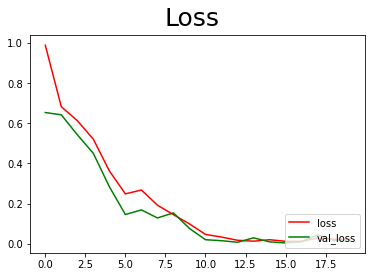

In [41]:
fig = plt.figure()
plt.plot(hist.history['loss'] , color = 'red' , label = 'loss')
plt.plot(hist.history['val_loss'] , color = 'green' , label = 'val_loss')
fig.suptitle('Loss' , fontsize = 25)
plt.legend(loc = "lower right")
plt.show()

#from the graph we can see our loss is steadily decreasing thus our model is working awesome!

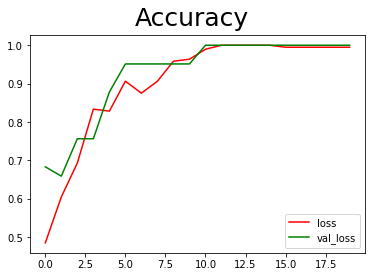

In [40]:
fig = plt.figure()
plt.plot(hist.history['accuracy'] , color = 'red' , label = 'loss')
plt.plot(hist.history['val_accuracy'] , color = 'green' , label = 'val_loss')
fig.suptitle('Accuracy' , fontsize = 25)
plt.legend(loc = "lower right")
plt.show()

#Since our accouracy is increasing to a value of 1 our model is working absolutely fine! And we dont have to do any further modifications.